In [1]:
import re
import pandas as pd

# Load and parse the complexity.txt file
def parse_complexity_file(file_path):
    equations = []
    with open(file_path, 'r') as file:
        lines = file.readlines()
        for line in lines:
            # Extract the variable, operation, and components using regex
            match = re.match(r"(\w+)\s*=\s*([\w\s\-+*/×]+)", line)
            if match:
                variable = match.group(1).strip()
                equation = match.group(2).strip().replace("×", "*").replace("÷", "/")  # Replace symbols with operators
                equations.append([variable, equation])
    return pd.DataFrame(equations, columns=['Variable', 'Equation'])

# Load the complexity data
df = parse_complexity_file('test_2_complexity.txt')
print(df)


         Variable                 Equation
0        Learning    Experience * Practice
1          Growth      Challenge / Comfort
2     Achievement     Effort * Persistence
3           Focus  Attention - Distraction
4    Intelligence  Knowledge + Application
..            ...                      ...
346      Braiding         Twist * Together
347      Knotting           Tie * Together
348       Linking          Connect * Parts
349      Bridging               Span * Gap
350       Bonding          Join * Together

[351 rows x 2 columns]


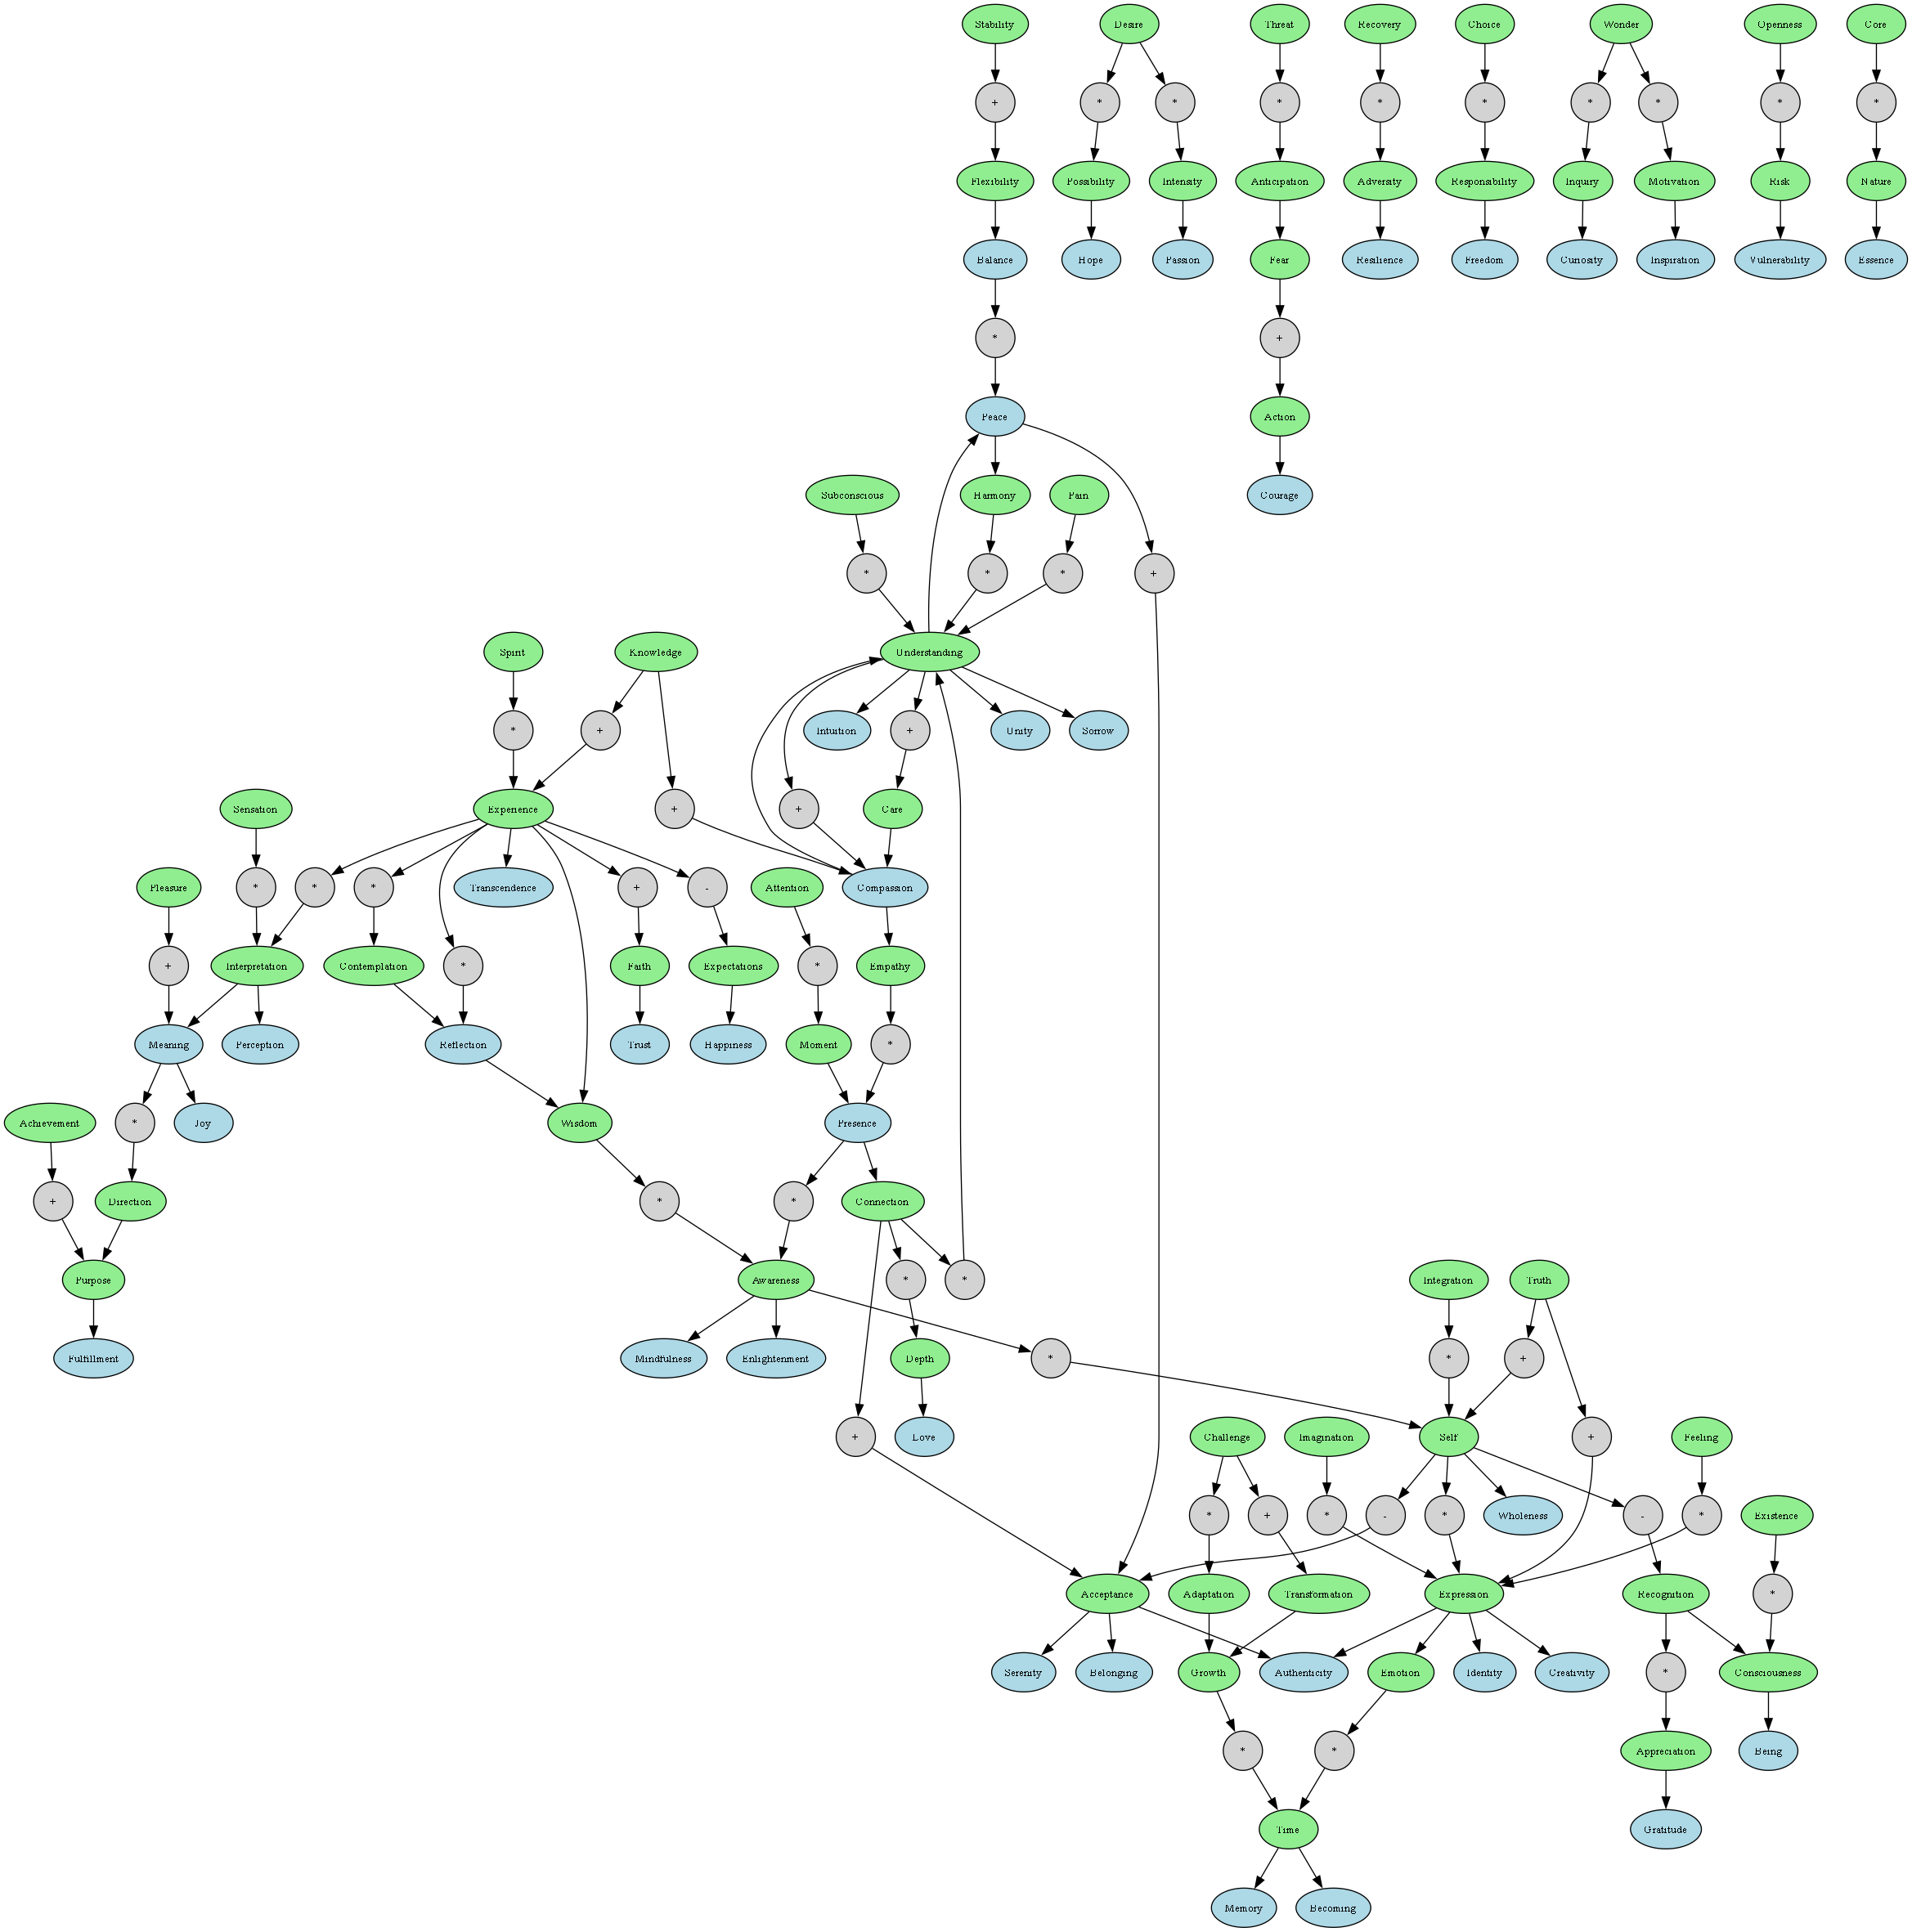

Graph generated for the first 50 lines of complexity.txt.


In [6]:
import re
import pandas as pd
from graphviz import Digraph
from IPython.display import Image, display

# Define a class structure to model variables and operations
class Metric:
    def __init__(self, name):
        self.name = name

# Define a function to parse the complexity.txt file
def parse_complexity_file(file_path, seq_range=10):
    equations = []
    with open(file_path, 'r') as file:
        lines = file.readlines()[:seq_range]  # Limit number of lines to seq_range
        for line in lines:
            # Match variable and equation components (operators are captured as part of group 2)
            match = re.match(r"(\w+)\s*=\s*([\w\s\-+*/×÷]+)", line)
            if match:
                variable = match.group(1).strip()
                # Replace `×` with `*` for multiplication and `÷` with `/` for division
                equation = match.group(2).strip().replace("×", "*").replace("÷", "/")
                equations.append([variable, equation])
    return pd.DataFrame(equations, columns=['Variable', 'Equation'])

# Define a function to build a graph with visible operators
def build_graph(df):
    dot = Digraph(format='png', node_attr={'style': 'filled', 'fontsize': '10'})
    
    metrics = {}  # Store Metric objects

    for index, row in df.iterrows():
        variable = row['Variable']
        equation = row['Equation']
        
        if variable not in metrics:
            metrics[variable] = Metric(variable)  # Create a new Metric object for the variable
        
        # Add the variable as a graph node
        dot.node(variable, fillcolor='lightblue')
        
        # Split the equation into components and operators (with spaces around operators)
        components = re.split(r'([\s+\-*\/])', equation)  # Include operators in split
        
        previous_component = None
        for component in components:
            component = component.strip()  # Clean up extra whitespace
            
            # Check for operators (accounting for * and / which may be present in the data)
            if component in {'+', '-', '*', '/'}:  
                # Add the operator as a node and link it between the previous and next variable
                operator_node = f"op{index}_{component}"  # Create unique operator node ID
                dot.node(operator_node, label=component, shape='circle', fillcolor='lightgrey')
                dot.edge(previous_component, operator_node)  # Link the previous component to the operator
                previous_component = operator_node  # Operator becomes the new "previous"
            elif component:
                if component not in metrics:
                    metrics[component] = Metric(component)  # Create a new Metric object for components
                dot.node(component, fillcolor='lightgreen')
                if previous_component:
                    dot.edge(previous_component, component)  # Add edge between operator and next component
                previous_component = component

        # Link the final component to the resulting variable
        dot.edge(previous_component, variable)

    return dot

# Main function to parse file, build graph and visualize it inline in a Jupyter notebook
def main(file_path, seq_range):
    df = parse_complexity_file(file_path, seq_range)
    graph = build_graph(df)
    graph_path = graph.render('simplified_graph_output', cleanup=True)  # Render graph to file
    display(Image(graph_path))  # Display the graph inline in the notebook
    print(f"Graph generated for the first {seq_range} lines of complexity.txt.")

# Example usage in a notebook
main('test_2_complexity.txt', seq_range=50)
